# Week 10

# Mounting the Drive 
Accessing file specifically in collaboratory:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
DataFolder_Path = "/content/gdrive/MyDrive/EETBS /Data"

# Importing the modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
ConsumptionFileName= "consumption_5545.csv"
TemperatureFileName= "Austin_weather_2014.csv"
IrradianceFileName= "irradiance_2014_gen.csv"


#Start

##Finding the path of the files

In [ ]:
#The ugly way!
ConsumptionFilePath = "/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv"

In [ ]:
#If you have many files, better option is:
ConsumptionFilePath = os.path.join(DataFolder_Path,ConsumptionFileName)

#Other method was writing DataFolder_Path + "/" + ConsumptionFileName. But it can lead to issue in different os.

In [ ]:
ConsumptionFilePath

'/content/gdrive/MyDrive/EETBS /Data/consumption_5545.csv'

Doing same with temperature and irradiance files:

In [ ]:
TemperatureFilePath = os.path.join(DataFolder_Path,TemperatureFileName)
IrradianceFilePath = os.path.join(DataFolder_Path,IrradianceFileName)

##Importing the datasets as dataframes

###CONSUMPTION

In [ ]:
DF_consumption = pd.read_csv(ConsumptionFilePath,sep=",",index_col=0)
DF_consumption.head(3)

,air conditioner_5545
2014-01-01 06:00:00,0.0
2014-01-01 07:00:00,0.0
2014-01-01 08:00:00,0.0


In [ ]:
DF_consumption.index = pd.to_datetime(DF_consumption.index)
DF_consumption.index

DatetimeIndex(['2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               '2014-01-01 10:00:00', '2014-01-01 11:00:00',
               '2014-01-01 12:00:00', '2014-01-01 13:00:00',
               '2014-01-01 14:00:00', '2014-01-01 15:00:00',
               ...
               '2014-12-30 20:00:00', '2014-12-30 21:00:00',
               '2014-12-30 22:00:00', '2014-12-30 23:00:00',
               '2014-12-31 00:00:00', '2014-12-31 01:00:00',
               '2014-12-31 02:00:00', '2014-12-31 03:00:00',
               '2014-12-31 04:00:00', '2014-12-31 05:00:00'],
              dtype='datetime64[ns]', length=8736, freq=None)

###TEMPERATURE

In [ ]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";",decimal=".")
DF_weather.head(3)

,localhour,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
0,2014-01-01 00:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
1,2014-01-01 01:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2,2014-01-01 02:00:00-06,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN


Changing time zone and new method to parse dates:

In [ ]:
DF_weather = pd.read_csv(TemperatureFilePath,sep=";",index_col=["localhour"],
                         parse_dates=["localhour"],
                         date_parser=lambda col: pd.to_datetime(col, utc=True).tz_convert("US/Central").tz_localize(None))
DF_weather.head(3)

,latitude,longitude,tz_offset,summary,ozone,ozone_error,temperature,temperature_error,dew_point,dew_point_error,humidity,humidity_error,visibility,visibility_error,apparent_temperature,apparent_temperature_error,pressure,pressure_error,wind_speed,wind_speed_error,cloud_cover,cloud_cover_error,wind_bearing,precip_intensity,precip_intensity_error,precip_probability,precip_type
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,40.36,NaN,30.12,NaN,0.67,NaN,10.00,NaN,36.89,NaN,1025.10,NaN,5.00,NaN,0.0,NaN,200.0,0.0,NaN,0.0,NaN
2014-01-01 01:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.11,NaN,30.46,NaN,0.74,NaN,9.77,NaN,33.79,NaN,1024.50,NaN,5.60,NaN,0.0,NaN,196.0,0.0,NaN,0.0,NaN
2014-01-01 02:00:00,30.292432,-97.699662,-6,Clear,NaN,NaN,38.65,NaN,31.92,NaN,0.77,NaN,8.46,NaN,35.80,NaN,1024.03,NaN,3.96,NaN,0.0,NaN,191.0,0.0,NaN,0.0,NaN


In [ ]:
DF_weather.index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2015-01-01 14:00:00', '2015-01-01 15:00:00',
               '2015-01-01 16:00:00', '2015-01-01 17:00:00',
               '2015-01-01 18:00:00', '2015-01-01 19:00:00',
               '2015-01-01 20:00:00', '2015-01-01 21:00:00',
               '2015-01-01 22:00:00', '2015-01-01 23:00:00'],
              dtype='datetime64[ns]', name='localhour', length=8736, freq=None)

extracting the "temperature" column only as dataframe:

In [ ]:
DF_temperature = DF_weather[["temperature"]]
DF_temperature.head(3)

,temperature
localhour,
2014-01-01 00:00:00,40.36
2014-01-01 01:00:00,38.11
2014-01-01 02:00:00,38.65


###IRRADIANCE

In [ ]:
DF_irradiance = pd.read_csv(IrradianceFilePath,sep=",")
DF_irradiance.head(3)

,"dataid;""localhour"";""use"";""air1"";""air2"";""air3"";""airwindowunit1"";""aquarium1"";""bathroom1"";""bathroom2"";""bedroom1"";""bedroom2"";""bedroom3"";""bedroom4"";""bedroom5"";""car1"";""clotheswasher1"";""clotheswasher_dryg1"";""diningroom1"";""diningroom2"";""dishwasher1"";""disposal1"";""drye1"";""dryg1"";""freezer1"";""furnace1"";""furnace2"";""garage1"";""garage2"";""gen"";""grid"";""heater1"";""housefan1"";""icemaker1"";""jacuzzi1"";""kitchen1"";""kitchen2"";""kitchenapp1"";""kitchenapp2"";""lights_plugs1"";""lights_plugs2"";""lights_plugs3"";""lights_plugs4"";""lights_plugs5"";""lights_plugs6"";""livingroom1"";""livingroom2"";""microwave1"";""office1"";""outsidelights_plugs1"";""outsidelights_plugs2"";""oven1"";""oven2"";""pool1"";""pool2"";""poollight1"";""poolpump1"";""pump1"";""range1"";""refrigerator1"";""refrigerator2"";""security1"";""shed1"";""sprinkler1"";""utilityroom1"";""venthood1"";""waterheater1"";""waterheater2"";""winecooler1"""
0,"8236;""2014-01-01 00:00:00"";0.30315000000000000..."
1,"8236;""2014-01-01 01:00:00"";0.35856666666666666..."
2,"8236;""2014-01-01 02:00:00"";0.36728333333333333..."


We can see that the separator is ";". So, we can modify it:

In [ ]:
DF_irradiance = pd.read_csv(IrradianceFilePath,sep=";",index_col=["localhour"],parse_dates=["localhour"])
DF_irradiance.head(3)

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5,car1,clotheswasher1,clotheswasher_dryg1,diningroom1,diningroom2,dishwasher1,disposal1,drye1,dryg1,freezer1,furnace1,furnace2,garage1,garage2,gen,grid,heater1,housefan1,icemaker1,jacuzzi1,kitchen1,kitchen2,kitchenapp1,kitchenapp2,lights_plugs1,lights_plugs2,lights_plugs3,lights_plugs4,lights_plugs5,lights_plugs6,livingroom1,livingroom2,microwave1,office1,outsidelights_plugs1,outsidelights_plugs2,oven1,oven2,pool1,pool2,poollight1,poolpump1,pump1,range1,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,8236,0.303150,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0051,0.0306,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.019717,NaN,NaN,NaN,-0.005967,0.303150,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0036,0.00115,NaN,NaN,NaN,NaN,NaN,NaN,0.075033,0.0079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 01:00:00,8236,0.358567,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.171067,NaN,NaN,NaN,-0.006317,0.358567,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074750,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-01 02:00:00,8236,0.367283,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,0.0000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.178183,NaN,NaN,NaN,-0.006350,0.367283,NaN,NaN,NaN,NaN,NaN,NaN,0.004,0.0,0.0000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,0.074883,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.016283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
DF_irradiance = DF_irradiance[["gen"]]
DF_irradiance.head(3)

,gen
localhour,
2014-01-01 00:00:00,-0.005967
2014-01-01 01:00:00,-0.006317
2014-01-01 02:00:00,-0.006350


In [ ]:
DF_irradiance.loc[DF_irradiance["gen"]<0,"gen"]=0
DF_irradiance.head(3)

,gen
localhour,
2014-01-01 00:00:00,0.0
2014-01-01 01:00:00,0.0
2014-01-01 02:00:00,0.0


***CLEANING* AND *UNDERSTANDING* DATA IS ESSENTIAL IN DATA DRIVEN MODELING**

##Joining dataframes

In [ ]:
DF_joined = DF_consumption.join([DF_temperature,DF_irradiance])
DF_joined.head(3)

,air conditioner_5545,temperature,gen
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583


Renaming the column titles:

In [ ]:
DF_joined = DF_joined.rename(columns={"air conditioner_5545":"Consumption",
                                      "gen":"Irradiance",
                                      "temperature":"Temperature"})
DF_joined.head(3)

,Consumption,Temperature,Irradiance
2014-01-01 06:00:00,0.0,39.36,0.000000
2014-01-01 07:00:00,0.0,37.86,0.052800
2014-01-01 08:00:00,0.0,38.97,0.773583


In [ ]:
DF_joined.tail(3)

,Consumption,Temperature,Irradiance
2014-12-31 03:00:00,NaN,39.33,0.0
2014-12-31 04:00:00,NaN,39.54,0.0
2014-12-31 05:00:00,NaN,38.99,0.0


As we can see above, there are some "NaN" values. we must handle this issue.

##Handling "NaN" -Not available Number- values

In [ ]:
DF_joined.dropna(inplace = True)
DF_joined.tail(3)

,Consumption,Temperature,Irradiance
2014-12-30 22:00:00,0.0,40.15,0.0
2014-12-30 23:00:00,0.0,40.00,0.0
2014-12-31 00:00:00,0.0,38.74,0.0


Dropping the rows is not always a good solution.
Sometimes you can replace these datas with "0" or for example with an "average value".

##Save the merged file as a file

In [ ]:
Joined_DF_FileName = "NR_joined_DF.csv"
Joined_DF_FilePath = os.path.join(DataFolder_Path,Joined_DF_FileName)
DF_joined.to_csv(Joined_DF_FilePath)

##Creating subplots (HQ!)

fig: The whole figure.

ax: each suplot.

+save the file in the same code box!

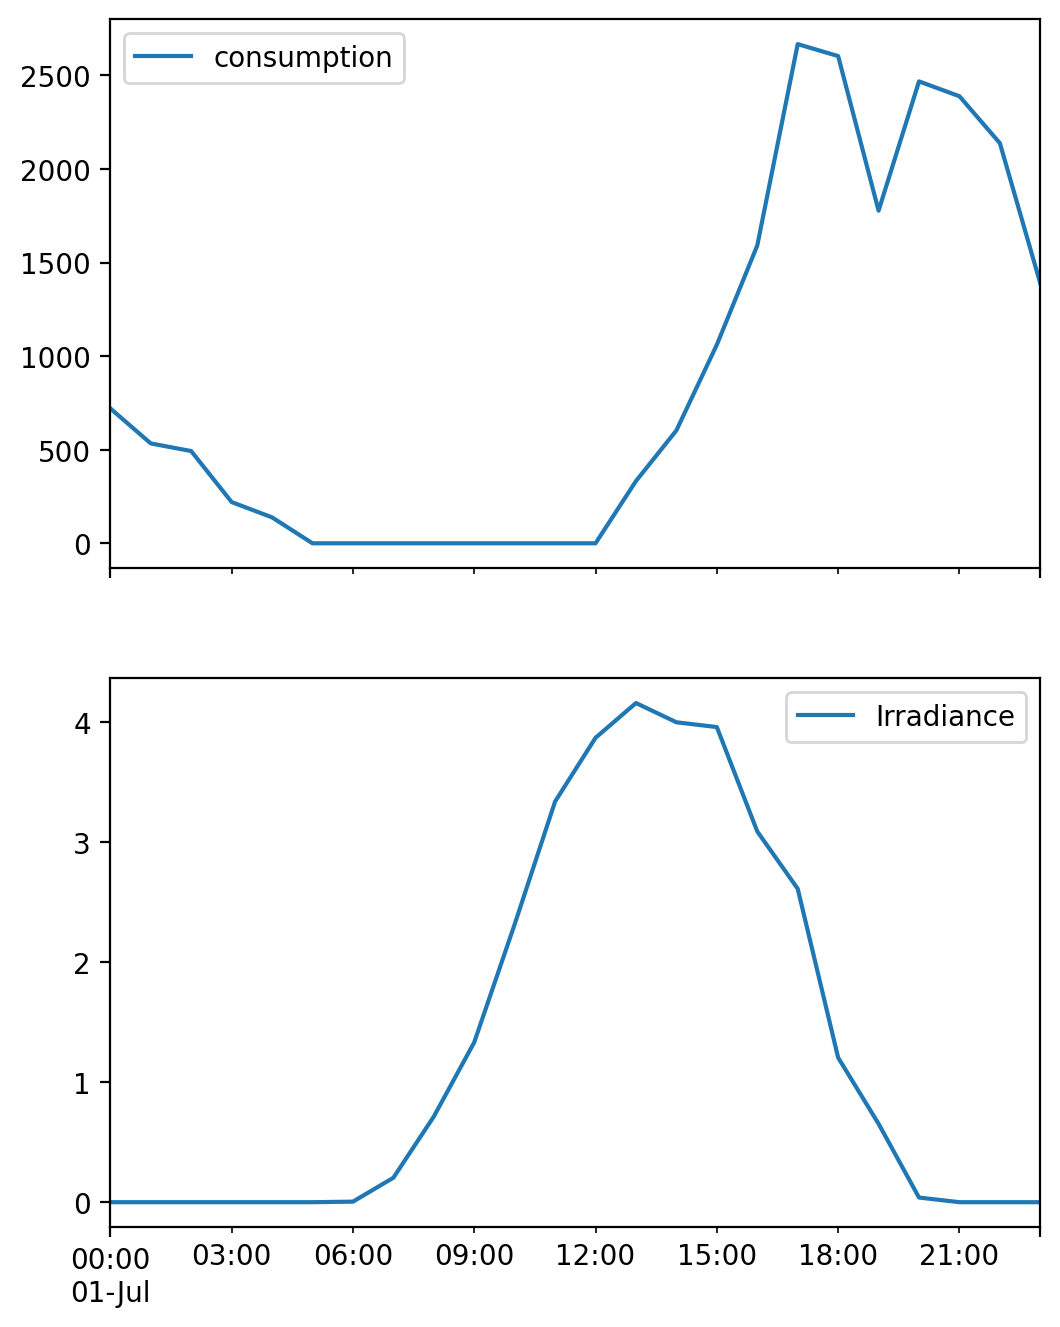

In [ ]:
DF_joined_selected = DF_joined.loc["2014-07-1 00:00:00":"2014-07-1 23:00:00"]
fig,axs = plt.subplots(2,1,figsize=(6,8),dpi=200,sharex=True) #This dpi is so high and results in HQ plots.

DF_joined_selected[["Consumption"]].plot(ax=axs[0])
axs[0].legend(["consumption"])

DF_joined_selected[["Irradiance"]].plot(ax=axs[1])
axs[1].legend(["Irradiance"])

figName = "NR_consumption_vs_irradiance_July.jpg"
figFilePath = os.path.join(DataFolder_Path,figName)
plt.savefig(figFilePath)

#Assignment 10

Repeat assignment 9, using new mehods you learnt, interacting with drive to import/export datasets.

Save datasets and generated figures to a file.